Source (https://en.wikipedia.org/wiki/Lorenz_system)


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/7928004d58943529a7be774575a62ca436a82a7f)

![](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)


The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. In particular, the equations describe the rate of change of three quantities with respect to time:

`x` is proportional to the rate of convection, 

`y` to the horizontal temperature variation,and

`z` to the vertical temperature variation.

The constants $\sigma$ , $\rho$ , and $\beta$  are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself

In [7]:
#http://experiences.math.cnrs.fr/Attracteur-de-Lorenz-en-3D.html
from IPython.core.display import display, HTML
display(HTML('<iframe style="overflow: hidden;" src="http://experiences.math.cnrs.fr/simulations/sd-Lorenz3D/index.html" height="550" width="100%" frameborder="0" scrolling="no"></iframe>'))

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [55]:
display(HTML('<iframe style="overflow: hidden;" src="http://experiences.math.cnrs.fr/simulations/systemesdynamiques/lorenz/index.html" height="550" width="100%" frameborder="0" scrolling="no"></iframe>'))

In [56]:
display(HTML('<iframe style="overflow: hidden;" src="http://experiences.math.cnrs.fr/simulations/systemesdynamiques/Lorenz-SensibiliteCI/index.html" height="650" width="100%" frameborder="0" scrolling="no"></iframe>'))

In [1]:
%pylab inline
import plotly.offline as pyo
import plotly.express as px
from ipywidgets import widgets, interactive_output, interact
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [3]:
def plot_phase_space(lrz):
    
    """ plots 3D scatter plot"""
    
   
    fig = go.Figure(data=[go.Scatter3d(
                                        x=lrz.X,
                                        y=lrz.Y,
                                        z=lrz.Z,
        
                                        mode='markers',
                                        marker=dict(size=3,color=[i for i in range(len(lrz.X))]),
                                        )])
    #fig.update_layout(autosize=False,width=900,height=800)
        
    fig.show()

In [4]:
def plot_time_series(lrz):
    
    """ plots time series"""
    
    fig = make_subplots(rows=1, cols=3,subplot_titles=["X time series","Y time series","Z time series"])


    fig.add_trace(go.Scattergl(
                                x = lrz.time,
                                y = lrz.X,
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,1)

    fig.add_trace(go.Scattergl(
                                x = lrz.time,
                                y = lrz.Y,
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,2)

    fig.add_trace(go.Scattergl(
                                x = lrz.time,
                                y = lrz.Z,
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,3)

    fig.show()


In [5]:
def plot_neighbour_Series(lrz):
    
    
    fig = make_subplots(rows=1, cols=3,subplot_titles=["x","y","z"])

    fig.add_trace(go.Scattergl(
                                x= lrz.X[1::2],
                                y = lrz.X[0::2],
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,1)


    fig.add_trace(go.Scattergl(
                                x= lrz.Y[1::2],
                                y = lrz.Y[0::2],
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,2)
    
    fig.add_trace(go.Scattergl(
                                x= lrz.Z[1::2],
                                y = lrz.Z[0::2],
                                mode='markers',
                                marker=dict(size=3)
                                ), 1,3)
    
    fig.show()

In [6]:
def plot_histogram(lrz):
    
    """ plots histogram ofvariables"""
    
    fig = make_subplots(rows=1, cols=3,subplot_titles=["X ","Y ","Z"])


    fig.add_trace(go.Histogram(
                                x = lrz.X
                                ), 1,1)

    fig.add_trace(go.Histogram(
                                x = lrz.Y
                                ), 1,2)

    fig.add_trace(go.Histogram(
                                x = lrz.Z
                                ), 1,3)

    fig.show()


In [7]:
class lorentz(object):
    
    """lorentz equations
    
    Parameters
    ------------
    sigma, rho, beta:  system parameters
    
    X0:             initial X
    Y0:             initial Y
    Z0 :            initial Z
    delta_t:        time_interval
    n_itr:          total no of iterations
    
    Attributes
    ------------
    time: stores the values of time for all iterations
    X: stores the values of x for all iterations
    Y: stores the values of y for all iterations
    Y: stores the values of z for all iterations
    
    Methods
    ------------
    Forward Euler Method for solving PDE
    
    """
    
    def __init__(self,sigma,rho,beta,X0,Y0,Z0,delta_t,n_itr):
        

        # system parameters
        self.sigma   = sigma
        self.rho     = rho
        self.beta    = beta
        
        #system variables
        self.X0      = X0
        self.Y0      = Y0
        self.Z0      = Z0
        
        #neumerical variables
        self.delta_t = delta_t
        self.n_itr   = n_itr
        
    def euler(self):
        
        #initiate the variables
        self.time  = np.zeros(self.n_itr)
        self.X     = np.zeros(self.n_itr)
        self.Y     = np.zeros(self.n_itr)
        self.Z     = np.zeros(self.n_itr)

        #assign inital varaibles
        self.X[0] = self.X0
        self.Y[0] = self.Y0
        self.Z[0] = self.Z0
        
        # carry iterations
        for i in range(self.n_itr-1):

            self.time[i+1]   = self.time[i]  + self.delta_t
            
            ## Main equations
            # X rate
            self.X[i+1]  = self.X[i] + self.delta_t*(self.sigma*(self.Y[i]-self.X[i]))
            # Y rate
            self.Y[i+1]  = self.Y[i] + self.delta_t*(self.X[i]*(self.rho-self.Z[i])-self.Y[i])
            # Z rate
            self.Z[i+1]  = self.Z[i] + self.delta_t*(self.X[i]*self.Y[i]-self.beta*self.Z[i])
            


        return self

In [8]:
def plot_lorentz_equations(sigma,rho,beta,X0,Y0,Z0,delta_t,n_itr):
    
    
    lrz= lorentz(sigma,rho,beta,X0,Y0,Z0,delta_t,n_itr).euler()
    print(sigma,rho,beta,X0,Y0,Z0,delta_t,n_itr)
    plot_phase_space(lrz)
    plot_time_series(lrz)
    plot_histogram(lrz)
    #plot_neighbour_Series(lrz)

In [9]:
def Lorentz_Equations_euler():

    sigma_widget = widgets.FloatSlider(value=10.0,min=0.0,max=100.0,step=0.01,orientation='vertical',description="sigma")
    rho_widget = widgets.FloatSlider(value=28.0,min=0.0,max=100.0,step=0.01,orientation='vertical',description="rho")
    beta_widget = widgets.FloatSlider(value=8.0/3.0,min=0.0,max=100.0,step=0.01,orientation='vertical',description="beta")

    X0_widget   = widgets.FloatSlider(value= 0.2, min=-5.0,max=5.0,step=0.01,orientation='vertical',description="X0")
    Y0_widget   = widgets.FloatSlider(value= 0.2, min=-5.0,max=5.0,step=0.01,orientation='vertical',description="Y0")
    Z0_widget   = widgets.FloatSlider(value= 0.2, min=-5.0,max=5.0,step=0.01,orientation='vertical',description="Z0")

    delta_t = widgets.FloatSlider(value= 0.02, min=0.001,max=0.1,step=0.0001,orientation='vertical',description="delta_t")
    n_itr   = widgets.IntSlider(value= 500, min=10,max=10000,step=100,orientation='vertical',description="n_itr")
    
    vec = widgets.HBox([sigma_widget,rho_widget,beta_widget,
                        X0_widget,Y0_widget,Z0_widget,
                        delta_t,n_itr])
    
    w = interactive_output(plot_lorentz_equations,
                           { 
                           "sigma":sigma_widget,
                           "rho":rho_widget,
                           "beta":beta_widget,
                               
                            "X0":X0_widget,
                            "Y0":Y0_widget,
                            "Z0":Z0_widget,
                               
                            "delta_t":delta_t,
                            "n_itr":n_itr

                            })

    display(vec,w)

In [10]:
Lorentz_Equations_euler()

Output()

## Previous solutions

### Recurrence plots

In [11]:
from sklearn.metrics import pairwise

In [14]:
def plot_recursion(t,X):
    '''
    function to plot recursion
    '''
    X = X.reshape(-1,1)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.scatter(t,X.ravel())
    plt.subplot(1,2,2)
    plt.imshow(pairwise.pairwise_distances(X),"gray")
    plt.colorbar()
    plt.show()

In [18]:
def plot_lorentz_equations_recursive(sigma,rho,beta,X0,Y0,Z0,delta_t,n_itr):
    
    
    lrz= lorentz(sigma,rho,beta,X0,Y0,Z0,delta_t,n_itr).euler()
    plot_recursion(lrz.time,lrz.X)
    plot_recursion(lrz.time,lrz.Y)
    plot_recursion(lrz.time,lrz.Z)

In [25]:
def Lorentz_Equations_euler_recursive():

    sigma_widget = widgets.FloatSlider(value=10.0,min=0.0,max=30.0,step=0.01,orientation='vertical',description="sigma")
    rho_widget = widgets.FloatSlider(value=28.0,min=0.0,max=30.0,step=0.01,orientation='vertical',description="rho")
    beta_widget = widgets.FloatSlider(value=8.0/3.0,min=0.0,max=30.0,step=0.01,orientation='vertical',description="beta")

    X0_widget   = widgets.FloatSlider(value= 0.2, min=-1.0,max=1.0,step=0.01,orientation='vertical',description="X0")
    Y0_widget   = widgets.FloatSlider(value= 0.2, min=-1.0,max=1.0,step=0.01,orientation='vertical',description="Y0")
    Z0_widget   = widgets.FloatSlider(value= 0.2, min=-1.0,max=1.0,step=0.01,orientation='vertical',description="Z0")

    delta_t = widgets.FloatSlider(value= 0.02, min=0.001,max=0.1,step=0.0001,orientation='vertical',description="delta_t")
    n_itr   = widgets.IntSlider(value= 500, min=10,max=10000,step=100,orientation='vertical',description="n_itr")
    
    vec = widgets.HBox([sigma_widget,rho_widget,beta_widget,
                        X0_widget,Y0_widget,Z0_widget,
                        delta_t,n_itr])
    
    w = interactive_output(plot_lorentz_equations_recursive,
                           { 
                           "sigma":sigma_widget,
                           "rho":rho_widget,
                           "beta":beta_widget,
                               
                            "X0":X0_widget,
                            "Y0":Y0_widget,
                            "Z0":Z0_widget,
                               
                            "delta_t":delta_t,
                            "n_itr":n_itr

                            })

    display(vec,w)

In [27]:
Lorentz_Equations_euler_recursive()

Output()

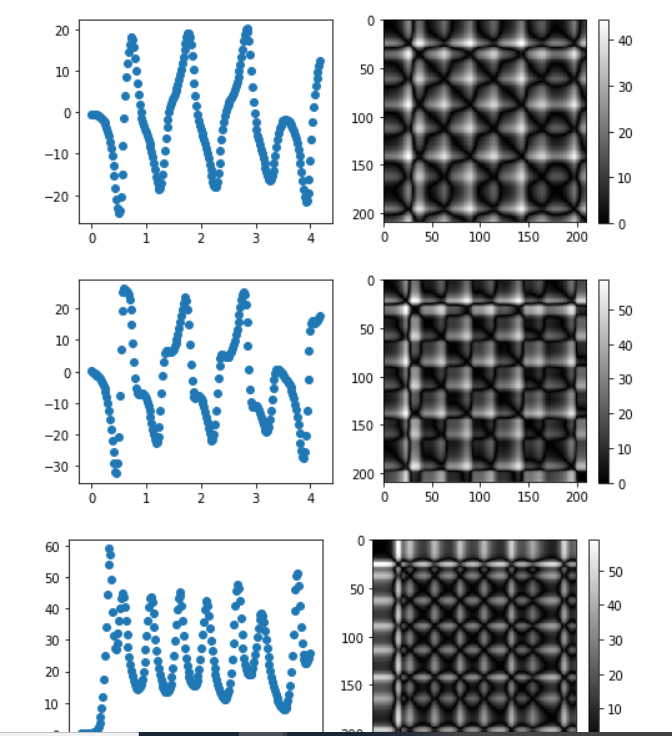

### another


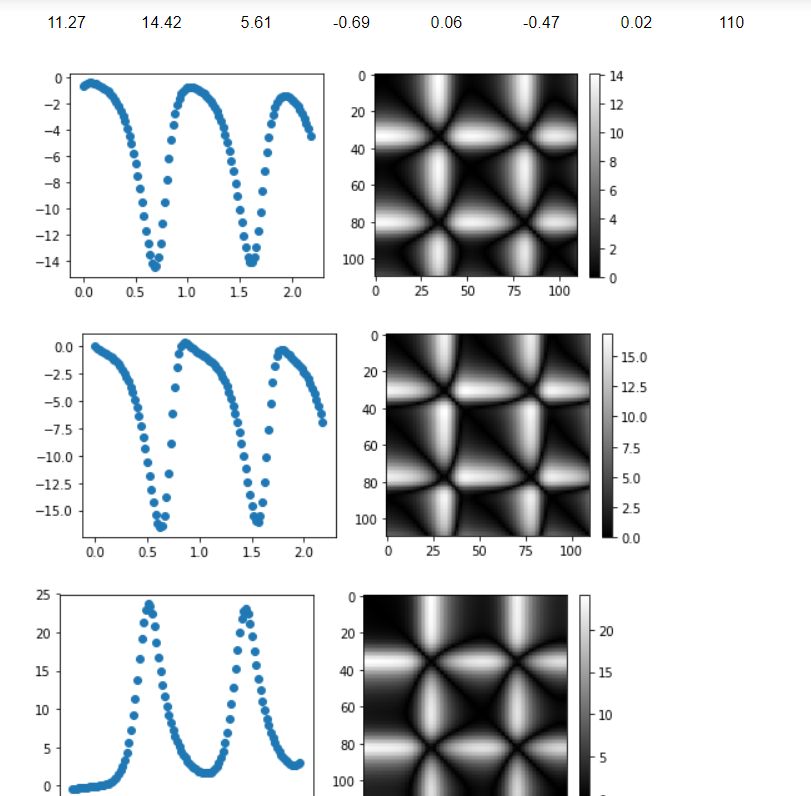